In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import numpy as np
 
data1 = np.loadtxt("../data/UnionCom/MMD/s1_mapped1.txt")
data2 = np.loadtxt("../data/UnionCom/MMD/s1_mapped2.txt")
# JAMIE will assume matrices with the same number of rows are
# completely matched if not provided a correspondence matrix
corr = np.eye(data1.shape[0], data2.shape[0])

2022-10-16 09:48:57.882524: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-16 09:48:57.882592: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/tmp/ipykernel_24054/1337732524.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  type1 = np.loadtxt("../data/Unioncom/MMD/s1_type1.txt").astype(np.int)
/tmp/ipyk

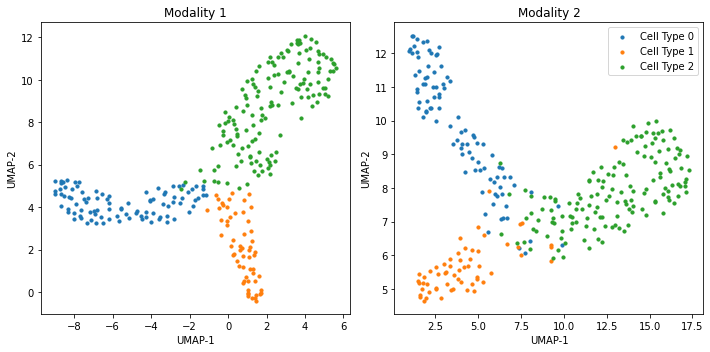

In [2]:
import matplotlib.pyplot as plt
from jamie.evaluation import plot_regular
 
# Load cell-type labels
type1 = np.loadtxt("../data/UnionCom/MMD/s1_type1.txt").astype(int)
type2 = np.loadtxt("../data/UnionCom/MMD/s1_type2.txt").astype(int)
type1 = np.array([f'Cell Type {i}' for i in type1])
type2 = np.array([f'Cell Type {i}' for i in type2])
 
# Visualize integrated latent spaces
fig = plt.figure(figsize=(10, 5))
plot_regular([data1, data2], [type1, type2], ['Modality 1', 'Modality 2'], legend=True)
plt.tight_layout()
plt.savefig('../../img/simulation_raw.png', dpi=300, bbox_inches='tight')

In [3]:
from jamie import JAMIE
 
jm = JAMIE(min_epochs=500)
integrated_data = jm.fit_transform(dataset=[data1, data2], P=corr)

use random seed: 666
Shape of Raw data
Dataset 0: (300, 2000)
Dataset 1: (300, 1000)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[500/2000] err:4.0456 alpha:0.5672
epoch:[1000/2000] err:3.3870 alpha:0.6652
epoch:[1500/2000] err:3.2497 alpha:0.7004
epoch:[2000/2000] err:3.2501 alpha:0.7204
Finished Matching!
---------------------------------
Train coupled autoencoders


/mnt/c/Users/nck/repos/nmacom/jamie/jamie.py:425: UserWarning: PCA dim must be lower than 300, found 512, adjusting to compensate.
  warnings.warn(
/mnt/c/Users/nck/repos/nmacom/jamie/jamie.py:425: UserWarning: PCA dim must be lower than 300, found 512, adjusting to compensate.
  warnings.warn(


epoch:[500/10000]: loss:0.431546
epoch:[1000/10000]: loss:0.452965
epoch:[1500/10000]: loss:0.450799
Finished Mapping!
---------------------------------
JAMIE Done!
Distance: 1.3136759159970097
Correspondence: 6.935581233003177
Mapping: 89.50641585804988
Total: 97.75567300705006



In [4]:
# Save model
jm.save_model('simulation_model.h5')
 
# Load model
jm.load_model('simulation_model.h5')

In [5]:
# data3 = ...
# data4 = ...
# new_integrated_data = jm.transform(dataset=[data3, data4])

In [6]:
data1_imputed = jm.modal_predict(data2, 1)
data2_imputed = jm.modal_predict(data1, 0)
# data3_imputed = jm.modal_predict(data4, 1)
# data4_imputed = jm.modal_predict(data3, 0)

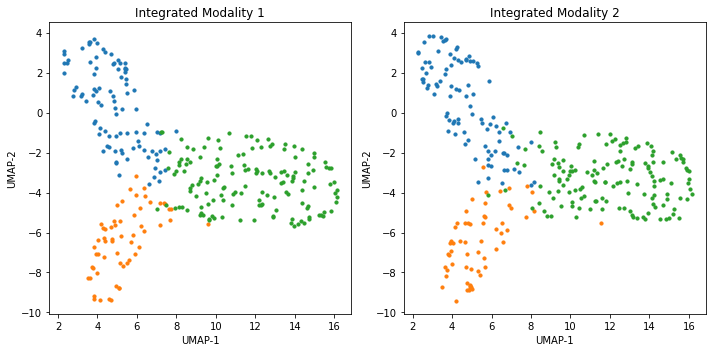

In [9]:
from jamie.evaluation import plot_integrated
 
# Visualize integrated latent spaces
fig = plt.figure(figsize=(10, 5))
plot_integrated(integrated_data, [type1, type2], ['Integrated Modality 1', 'Integrated Modality 2'])
plt.tight_layout()
plt.savefig('../../img/simulation_integrated.png', dpi=300, bbox_inches='tight')

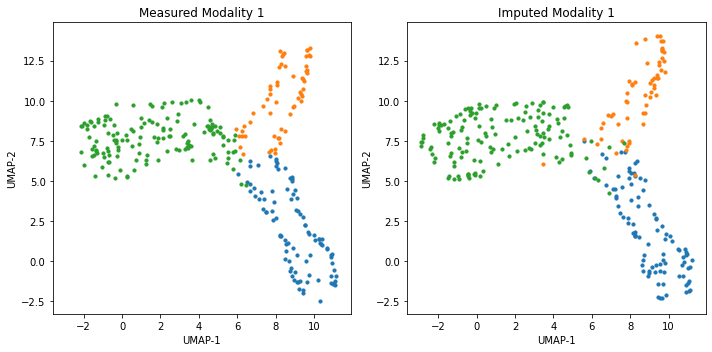

In [8]:
# Visualize imputed data
fig = plt.figure(figsize=(10, 5))
plot_integrated([data1, data1_imputed], [type1, type1], ['Measured Modality 1', 'Imputed Modality 1'])
plt.tight_layout()
plt.savefig('../../img/simulation_imputed.png', dpi=300, bbox_inches='tight')